In [15]:
from sklearn.datasets import make_regression
import pandas as pd
from tab_forge.dataset import Dataset

In [16]:
X, y = make_regression(n_samples=1000, n_features=5, n_informative=3, noise=0.1, random_state=42)
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(5)])
df['target'] = y
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,target
0,-0.735201,1.798725,-1.095519,1.656208,-0.880754,47.887298
1,-1.613561,-1.371901,-0.172946,1.471170,1.711708,-33.542467
2,0.651391,0.954002,0.570891,-0.315269,1.135566,75.040627
3,-1.350556,-0.687014,-0.475795,-0.075871,-0.826112,-55.337505
4,1.554160,0.342338,-0.530971,0.853976,-0.335138,0.470015


In [17]:
dataset = Dataset(
    data=df,
    target='target',
    task_type='regression',
    numerical_features=['feature_1', 'feature_0', 'feature_2', 'feature_3','feature_4'],
    categorical_features=[]
)

In [18]:
dataset

Dataset(samples=1000, features=5, task='regression')

In [19]:
dataset.summary()

{'shape': (1000, 6),
 'task_type': 'regression',
 'target': 'target',
 'n_numerical': 5,
 'n_categorical': 0,
 'n_unregistered': 0,
 'missing_values': {'feature_0': 0,
  'feature_1': 0,
  'feature_2': 0,
  'feature_3': 0,
  'feature_4': 0,
  'target': 0}}

In [20]:
dataset.get_registered_data().head()

,feature_0,feature_1,feature_2,feature_3,feature_4,target
0,-0.735201,1.798725,-1.095519,1.656208,-0.880754,47.887298
1,-1.613561,-1.371901,-0.172946,1.471170,1.711708,-33.542467
2,0.651391,0.954002,0.570891,-0.315269,1.135566,75.040627
3,-1.350556,-0.687014,-0.475795,-0.075871,-0.826112,-55.337505
4,1.554160,0.342338,-0.530971,0.853976,-0.335138,0.470015


### CTGAN

In [21]:
from tab_forge.models import CTGANSynthesizer

In [22]:
model = CTGANSynthesizer(epochs=100)

In [23]:
model.get_hyperparameters()

{'epochs': 100,
 'discriminator_lr': 0.0002,
 'generator_lr': 0.0002,
 'batch_size': 500,
 'embedding_dim': 128,
 'generator_dim': [256, 256],
 'discriminator_dim': [256, 256],
 'generator_decay': 1e-06,
 'discriminator_decay': 1e-06,
 'discriminator_steps': 1,
 'log_frequency': True,
 'pac': 10,
 'verbose': False}

In [24]:
model.fit(dataset)

c:\Users\user\miniforge3\envs\nir_venv_py3_11\Lib\site-packages\sdv\single_table\base.py:168: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
c:\Users\user\miniforge3\envs\nir_venv_py3_11\Lib\site-packages\sdv\single_table\base.py:134: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
c:\Users\user\miniforge3\envs\nir_venv_py3_11\Lib\site-packages\ctgan\synthesizers\_utils.py:16: FutureWarning: `cuda` parameter is deprecated and will be removed in a future release. Please use `enable_gpu` instead.
  warnings.warn(


In [25]:
model.generate(10)

,feature_0,feature_1,feature_2,feature_3,feature_4,target
0,1.444097,3.039190,2.231618,-2.353093,0.216439,48.783724
1,-1.328139,2.461426,-0.382658,0.619242,-0.082062,114.743172
2,-1.194288,-0.308778,1.726339,-0.184389,0.984667,75.287083
3,-1.346039,-2.374329,-0.250448,-0.198704,0.092587,-6.662958
4,0.313876,2.439573,1.513863,0.517143,-0.674316,185.260006
5,-0.463332,1.695701,-1.221902,0.942008,1.794860,-60.521068
6,-1.623067,-2.408398,-0.650113,1.195298,-1.517674,94.643736
7,-2.228714,0.246075,1.265511,-0.505735,-1.177478,-99.994798
8,-1.453825,-0.811615,0.642840,-0.669032,-1.661328,48.057787
9,-2.044353,-0.566285,-0.493708,1.717871,-0.994546,78.987857


In [26]:
sample_dataset = model.structed_generate(10)
print(sample_dataset)
print(sample_dataset.get_registered_data())

Dataset(samples=10, features=5, task='regression')
   feature_0  feature_1  feature_2  feature_3  feature_4      target
0  -1.942796   1.872843   2.303236  -3.176704  -0.657115   46.895650
1  -1.590343   2.106130   1.277381  -1.496416  -1.247670  -63.487126
2  -1.065608  -0.187676   0.227566  -0.132608   0.679449  -70.454655
3  -1.132020  -0.963882   2.057440   0.530792  -2.350425  -24.906755
4  -2.288990   1.294832   0.703762  -0.871739   0.075521   93.428130
5  -0.374635  -0.283399  -1.007560   1.928330  -0.123097   91.734911
6  -1.002465  -1.221347  -0.645583   1.840162  -2.069236   59.682046
7  -0.133488  -1.482234  -2.871263   1.242093  -2.691522  145.276946
8   0.224063   0.530473   2.309931  -0.418204  -2.749176   89.538633
9  -0.808345  -0.514143  -0.989547  -0.797955  -1.664410  113.800509


In [27]:
df_losses = model.get_losses()

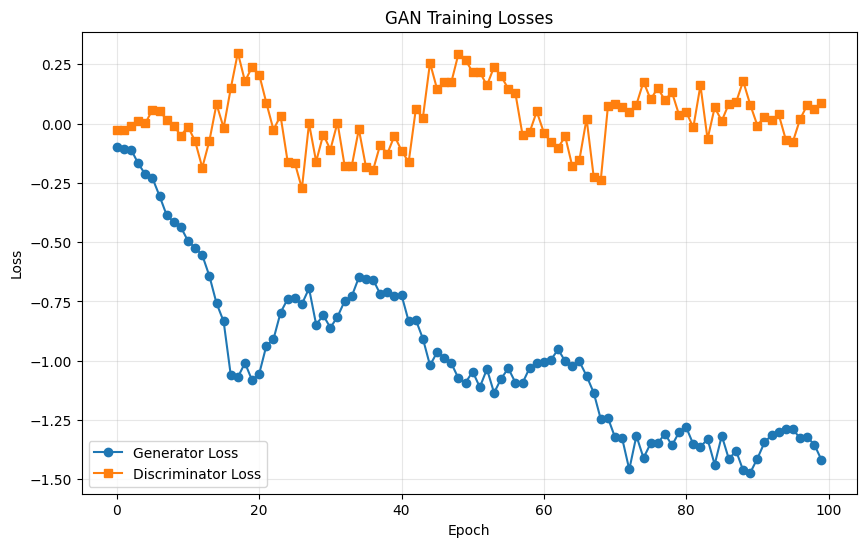

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Предполагаем df уже существует с колонками 'Epoch', 'Generator Loss', 'Discriminator Loss'
plt.figure(figsize=(10, 6))
plt.plot(df_losses['Epoch'], df_losses['Generator Loss'], label='Generator Loss', marker='o')
plt.plot(df_losses['Epoch'], df_losses['Discriminator Loss'], label='Discriminator Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GAN Training Losses')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### WGAN-GP

In [29]:
from tab_forge.models import WGANSynthesizer

In [30]:
model = WGANSynthesizer(epochs=100)

In [31]:
model.get_hyperparameters()

{'epochs': 100,
 'generator_dim': (256, 256),
 'discriminator_dim': (256, 256),
 'embedding_dim': 64,
 'discriminator_lr': 0.0001,
 'generator_lr': 0.0001,
 'batch_size': 64,
 'gp_weight': 1.0,
 'critic_iterations': 3}

In [32]:
model.fit(dataset)

In [33]:
model.generate(10)

,feature_0,feature_1,feature_2,feature_3,feature_4,target
0,-1.312643,0.879384,2.993600,-1.456958,1.155663,5.422556
1,-0.087542,0.704139,0.743742,1.483134,-0.340453,4.654716
2,1.015620,-1.298114,2.083878,1.150514,1.670581,33.640762
3,-0.104223,-0.971152,0.565210,-0.945046,0.826411,19.785276
4,2.992351,-1.669652,2.503083,2.794633,2.752854,34.012329
5,0.312175,1.380519,1.737391,-0.267559,-0.422710,5.479635
6,2.990005,-2.090817,2.401024,1.644748,0.637500,50.841183
7,1.458245,-0.055571,0.321211,0.990098,1.983762,14.968102
8,1.334710,-0.538212,0.126875,1.747061,0.523048,27.681103
9,2.797010,-2.663944,1.715802,1.200241,0.761466,45.590614


In [34]:
sample_dataset = model.structed_generate(10)
print(sample_dataset)
print(sample_dataset.get_registered_data().head())

Dataset(samples=10, features=5, task='regression')
   feature_0  feature_1  feature_2  feature_3  feature_4     target
0   0.659861  -2.540052  -0.746134   1.148751  -1.056673  15.641848
1   1.262328   0.229978   1.149410   2.203632   1.119727  11.511511
2   0.873553  -0.434191   0.417486   0.913153   0.832187  10.166737
3  -0.710335  -1.942480   2.529175  -0.536087   0.871045  44.098404
4   0.995351   0.563746   2.884120  -0.639859   1.552564  51.140163


In [35]:
df_losses = model.get_losses()

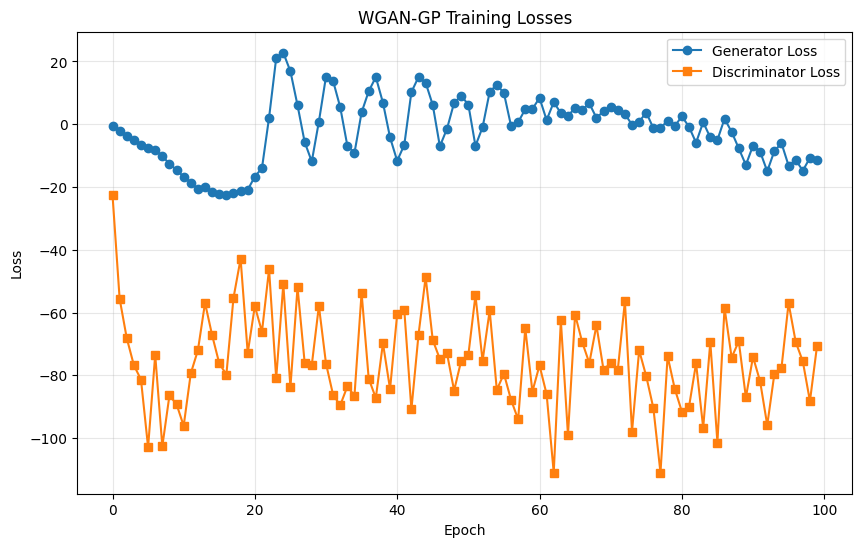

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Предполагаем df уже существует с колонками 'Epoch', 'Generator Loss', 'Discriminator Loss'
plt.figure(figsize=(10, 6))
plt.plot(df_losses['Epoch'], df_losses['Generator Loss'], label='Generator Loss', marker='o')
plt.plot(df_losses['Epoch'], df_losses['Discriminator Loss'], label='Discriminator Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('WGAN-GP Training Losses')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### GAN-MFS

In [37]:
from tab_forge.models import GANMFSSynthesizer

In [38]:
model = GANMFSSynthesizer(epochs=100)

In [39]:
model.get_hyperparameters()

{'epochs': 100,
 'generator_dim': (256, 256),
 'discriminator_dim': (256, 256),
 'embedding_dim': 64,
 'discriminator_lr': 0.0001,
 'generator_lr': 0.0001,
 'batch_size': 64,
 'gp_weight': 1.0,
 'critic_iterations': 3,
 'mfs_lambda': 0.5,
 'subset_mfs': ['mean', 'var'],
 'sample_number': 3,
 'sample_frac': 0.3}

In [40]:
model.fit(dataset)

In [41]:
model.generate(10)

,feature_0,feature_1,feature_2,feature_3,feature_4,target
0,0.506417,-0.909356,1.276096,0.269600,-2.502515,-61.340221
1,0.123346,-1.222297,-1.406331,0.698400,1.238824,2.159456
2,0.777640,-0.494271,-0.765833,0.784340,-1.031344,-15.928049
3,0.840319,-0.936042,-0.767136,0.998181,0.870309,-35.137550
4,1.114907,-0.710276,0.141295,-0.907738,-0.220603,-53.312538
5,-1.657173,1.981945,1.211025,-0.002899,1.270580,136.115280
6,1.150987,-1.771796,0.703865,-0.127411,-1.711085,-124.354042
7,0.363935,1.178300,0.118757,-1.555928,-0.102529,91.143036
8,0.012748,-1.339817,-0.020177,-0.311137,1.388520,-40.268692
9,0.830286,0.962874,-0.780372,0.429880,1.747553,46.711681


In [42]:
sample_dataset = model.structed_generate(10)
print(sample_dataset)
print(sample_dataset.get_registered_data().head())

Dataset(samples=10, features=5, task='regression')
   feature_0  feature_1  feature_2  feature_3  feature_4      target
0  -0.754899  -1.251273  -1.018082   0.711016   1.072584  -45.774078
1   0.312290   0.203188   1.324126   1.026001  -0.045492  101.927307
2  -0.507342  -0.652839  -1.362077   1.417036   1.037681  -17.098923
3   1.168567  -0.307278  -0.303019  -0.489125  -0.777022  -39.856068
4   0.953441  -0.102133   0.368408   0.158009   1.255881  -21.458754


In [43]:
df_losses = model.get_losses()

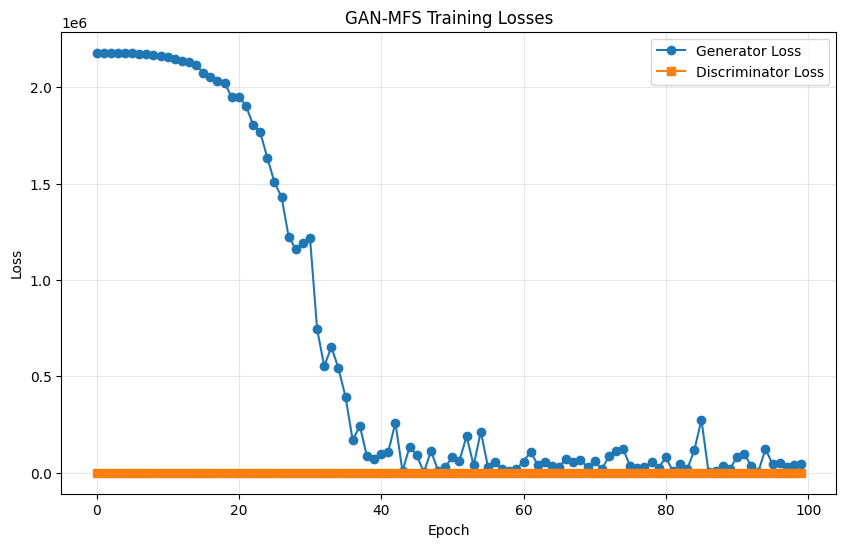

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Предполагаем df уже существует с колонками 'Epoch', 'Generator Loss', 'Discriminator Loss'
plt.figure(figsize=(10, 6))
plt.plot(df_losses['Epoch'], df_losses['Generator Loss'], label='Generator Loss', marker='o')
plt.plot(df_losses['Epoch'], df_losses['Discriminator Loss'], label='Discriminator Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GAN-MFS Training Losses')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### CTAB-GAN-PLUS

In [45]:
from tab_forge.models import CTABGANPlusSynthesizer

In [46]:
model = CTABGANPlusSynthesizer(epochs=10, batch_size=64)

In [47]:
model.get_hyperparameters()

{'epochs': 10,
 'batch_size': 64,
 'lr': 0.0002,
 'random_dim': 128,
 'critic_iterations': 3,
 'class_dim': [256, 256],
 'l2scale': 0.0001}

In [48]:
model.fit(dataset=dataset)

c:\Users\user\miniforge3\envs\nir_venv_py3_11\Lib\site-packages\sklearn\mixture\_base.py:275: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\user\miniforge3\envs\nir_venv_py3_11\Lib\site-packages\sklearn\mixture\_base.py:275: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\user\miniforge3\envs\nir_venv_py3_11\Lib\site-packages\sklearn\mixture\_base.py:275: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\user\miniforge3\envs\nir_venv_py3_11\Lib\site-packages\sklearn\mixture\_base.py:275: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or

In [49]:
model.generate(10)

,feature_0,feature_1,feature_2,feature_3,feature_4,target
0,-0.285024,-1.391630,-0.400087,1.263659,0.592422,8.846203
1,0.928175,-0.115504,-0.673455,1.371295,-1.390221,-50.570559
2,0.044890,-0.283533,0.824265,-0.509236,-1.378600,-120.374135
3,1.392318,0.931630,-0.114172,0.734390,-0.442160,-42.275422
4,1.320457,-0.375183,0.425163,0.419608,-0.232608,3.996502
5,1.471651,-0.323019,0.011169,1.693713,-0.301090,12.222930
6,1.218263,-0.263265,1.338952,-1.727347,1.684514,0.067706
7,-0.146444,0.423477,1.614677,2.150561,0.502759,29.372670
8,-0.112406,0.081978,-0.220329,1.482635,0.373773,-67.502298
9,1.569511,-0.604607,-0.526901,2.221334,-0.458685,-111.199996


In [50]:
sample_dataset = model.structed_generate(10)
print(sample_dataset)
print(sample_dataset.get_registered_data().head())

Dataset(samples=10, features=5, task='regression')
   feature_0  feature_1  feature_2  feature_3  feature_4     target
0  -0.547927  -1.087517   0.585378   0.798490  -0.451419 -82.340372
1  -0.368713  -0.885710  -0.234963   3.355455  -0.819432 -44.731388
2   1.367738   0.112170   0.248097  -1.206512  -2.107729 -53.127418
3  -0.009251  -1.357128  -0.304622   0.365923  -0.735865 -45.017245
4   1.567571  -1.591819   1.056233  -0.068984   1.108027  -8.793624


In [51]:
df_losses = model.get_losses()

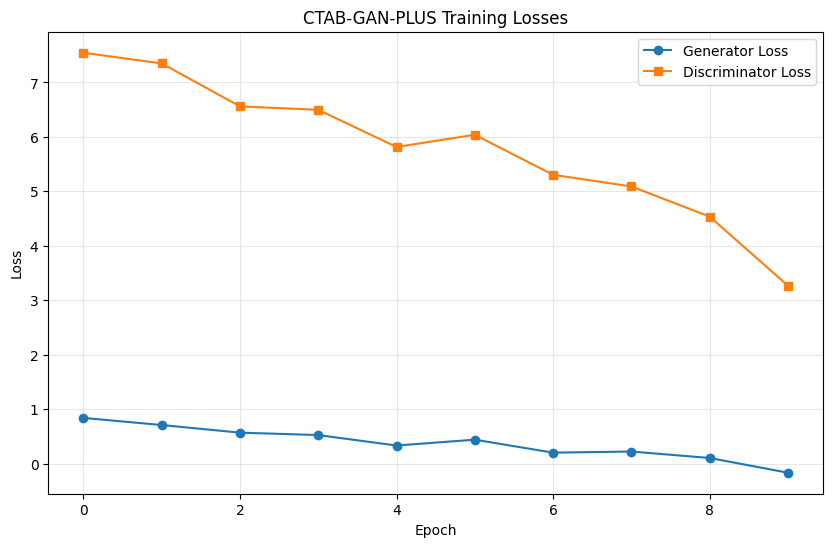

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# Предполагаем df уже существует с колонками 'Epoch', 'Generator Loss', 'Discriminator Loss'
plt.figure(figsize=(10, 6))
plt.plot(df_losses['Epoch'], df_losses['Generator Loss'], label='Generator Loss', marker='o')
plt.plot(df_losses['Epoch'], df_losses['Discriminator Loss'], label='Discriminator Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CTAB-GAN-PLUS Training Losses')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
